# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
def get_data_loader(batch_size):
    transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,)),
                              ])

    # Create training set and define training dataloader
    ## YOUR CODE HERE ##
    train_data = datasets.MNIST('./data', download=True, train=True, transform=transform)
    test_data = datasets.MNIST('./data', download=True, train=False, transform=transform)


    # Create test set and define test dataloader
    ## YOUR CODE HERE ##
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
    
    return train_loader, test_loader

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

<span style="color: #cc0066;">
    
Answer:

1. The MNIST dataset already has the images sized to 28x28, so I thought there is no need to resize or crop.
    
2. I did not use augmentations like flip or rotation because it changes the shape of the number and the number looses its meaning.

3. I applied the Tensor transform for the pytorch to use it while training.

4. I tried to find the best mean and std value for the distribution of the MNIST images and found this (0.1307,), (0.3081,).

</span>

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


5


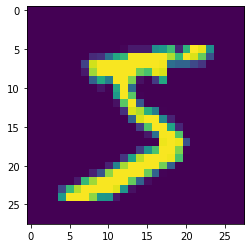

0


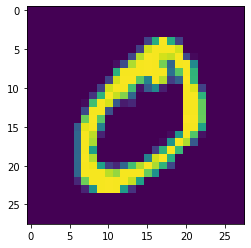

4


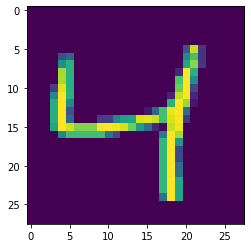

1


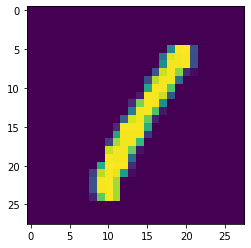

9


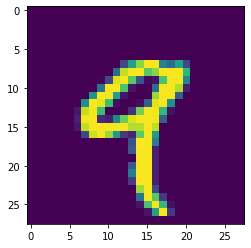

In [4]:
# Explore data
## YOUR CODE HERE ##
train_loader_p, test_loader_p = get_data_loader(32)
show5(train_loader_p)


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

<span style="color: #cc0066;"> <font size="+1"> The hidden parameter size is taken as a variable hyper-parameter to tune the model based on number of parameters.</font> </span>


<span style="color: #cc0066;"> <font size="+1">Only linear layers are used since we are exploring bsic neural networks. Adding convolutional neural network improves convergence of the model to many times.</font> </span>

In [5]:
## YOUR CODE HERE ##
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self, hidden_size = 512):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size*2)
        self.fc3 = nn.Linear(hidden_size*2, 10) ### number of class is 10 number of digits
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# initialize the NN


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

<span style="color: #cc0066;"> <font size="+1"> The learning rate is taken as a variable hyper-parameter to tune the model later</font> </span>

In [11]:
## YOUR CODE HERE ##
def init_loss_optim(model, lr = 0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr)
    return criterion, optimizer



## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

<span style="color: #cc0066;"> <font size="+1"> The train function takes all the paramters needed to re-train the model with different hyper-parameter settings </font> </span>

In [7]:
## YOUR CODE HERE ##
def train(model, n_epochs, train_loader, criterion, optimizer):
    losses = {'train':[], 'test':[]}
    model.train()
    for epoch in range(n_epochs):
        train_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*data.size(0)

        train_loss = train_loss/len(train_loader.dataset)
        losses['train'].append(train_loss)

        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1, 
            train_loss
            ))
    return losses

Plot the training loss (and validation loss/accuracy, if recorded).

In [8]:
def plot_loss(losses):
    fig, ax = plt.subplots()
    plt.plot(losses['train'], label='Training', alpha=0.5)
    plt.title("Training and Testing Losses")
    plt.legend()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [19]:
## YOUR CODE HERE ##
def test(model, test_loader, criterion):
    test_loss = 0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval()
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target)
        test_loss += loss.item()*data.size(0)
        _, pred = torch.max(output, 1)
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))

        for i in range(16):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # calculate and print avg test loss
    test_loss = test_loss/len(test_loader.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [20]:
def test_case (batch_size = 64, n_epochs = 10, hidden_size = 512, lr = 0.01):
    train_loader, test_loader = get_data_loader(batch_size)
    model = Net(hidden_size)
    print(model)
    criterion, optimizer = init_loss_optim(model, lr)
    losses = train(model, n_epochs, train_loader, criterion, optimizer)
    plot_loss(losses)
    test(model, test_loader, criterion)
    return model        #for saving

<span style="color: #cc0066;"> <font size="+1">Hyper-parameter tuning Test case 1
</font> </span>


Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch: 1 	Training Loss: 0.723070
Epoch: 2 	Training Loss: 0.319563
Test Loss: 0.249273

Test Accuracy of     0: 98% (237/241)
Test Accuracy of     1: 97% (282/288)
Test Accuracy of     2: 88% (234/263)
Test Accuracy of     3: 93% (243/261)
Test Accuracy of     4: 93% (252/270)
Test Accuracy of     5: 91% (197/216)
Test Accuracy of     6: 92% (207/223)
Test Accuracy of     7: 91% (241/263)
Test Accuracy of     8: 91% (204/223)
Test Accuracy of     9: 94% (250/264)

Test Accuracy (Overall): 93% (2347/2512)


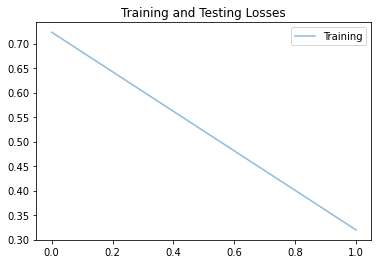

In [21]:
model = test_case (batch_size = 64, n_epochs = 2, hidden_size = 512, lr = 0.01)

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

<span style="color: #cc0066;"> <font size="+1">Hyper-parameter tuning Test case 2
</font> </span>


Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch: 1 	Training Loss: 0.387891
Epoch: 2 	Training Loss: 0.166393
Test Loss: 0.115636

Test Accuracy of     0: 98% (238/241)
Test Accuracy of     1: 98% (284/288)
Test Accuracy of     2: 94% (249/263)
Test Accuracy of     3: 97% (254/261)
Test Accuracy of     4: 95% (258/270)
Test Accuracy of     5: 94% (205/216)
Test Accuracy of     6: 95% (213/223)
Test Accuracy of     7: 94% (249/263)
Test Accuracy of     8: 95% (214/223)
Test Accuracy of     9: 96% (255/264)

Test Accuracy (Overall): 96% (2419/2512)


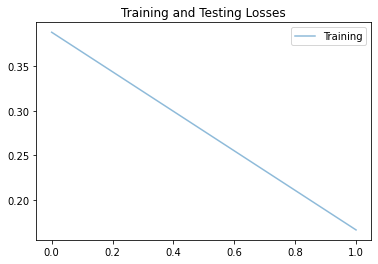

In [22]:
## YOUR CODE HERE ##

model = test_case (batch_size = 64, n_epochs = 2, hidden_size = 256, lr = 0.05)

## Saving your model
Using `torch.save`, save your model for future loading.

In [23]:
## YOUR CODE HERE ##
model_save_file = "saved_models"
torch.save(model.state_dict(), model_save_file)